**Aluno:** Lucas Menezes Costa

**Matrícula:** 202000066884

**Modelo:** [cardiffnlp/twitter-roberta-base-sentiment-latest](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest)

**Dataset:** [Sentiment140 dataset with 1.6 million tweets](https://www.kaggle.com/datasets/kazanova/sentiment140)

Meu dataset diz conter 3 labels, mas na prática contém apenas 2. Já meu modelo, foi treinado com 3 labels.

Se desejar executar, recomendo utilizar o notebook do colab: https://colab.research.google.com/drive/1vY_35BYbp34Y48LCqOMkRRK-Vi-nfFjW?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

Importando o dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


column_names = ['labels', 'id', 'date', 'flag', 'user', 'text']

df = pd.read_csv('/content/drive/MyDrive/PLN/Atividade2/dataset.csv', encoding='latin-1', names=column_names)

Mostrando o início do dataset

In [3]:
# Apresentação dos atributos do dataset
print(f"Colunas do dataset: {df.columns}")

# Distribuição das classes
print(df['labels'].value_counts())

# Exemplo das primeiras entradas do dataset com as classes
df.head()

Colunas do dataset: Index(['labels', 'id', 'date', 'flag', 'user', 'text'], dtype='object')
labels
0    800000
4    800000
Name: count, dtype: int64


,labels,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Gráfico de distribuição das classes

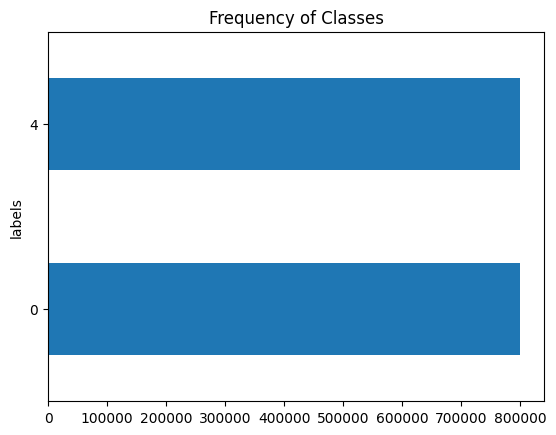

In [4]:
df["labels"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

Gráfico boxplot para mostrar o tamanho dos textos por classe

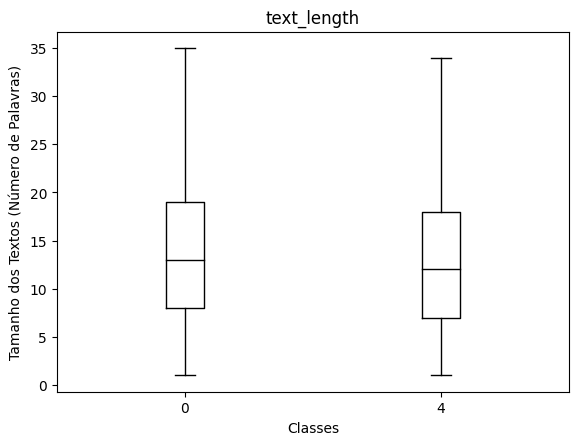

In [5]:
# Calculando o tamanho dos textos
df['text_length'] = df['text'].str.split().apply(len)

# Boxplot do tamanho dos textos por classe
df.boxplot(column="text_length", by="labels", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("Classes")
plt.ylabel("Tamanho dos Textos (Número de Palavras)")
plt.show()


Aqui eu faço a conversão dos labels '4' para '1', para que tenha uma representação binária.

In [6]:
# Função para converter os rótulos
def convert_labels(label):
    if label == 4:
        return 1
    return label

# Aplicar a função ao DataFrame
df['labels'] = df['labels'].apply(convert_labels)

In [56]:
print(df['labels'].value_counts())

labels
0    800000
1    800000
Name: count, dtype: int64


Separação do dataset em treino (70%), validação (20%) e teste (10%)

Definição e apresentação daestrutura e divisão do dataset para treinamento, validação e teste.

In [8]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em treino (70%) e um conjunto temporário (30%) usando stratify
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['labels'])

# Dividir o conjunto temporário em validação (20% do total) e teste (10% do total) usando stratify
val_df, test_df = train_test_split(temp_df, test_size=0.33, random_state=42, stratify=temp_df['labels'])

Como o tempo de espera para o treinamento é muito grande, decidi adicionar este código para pegar apenas 1% e ser utilizado apenas a título de demonstração

In [9]:
# Selecionar 1% de cada classe para cada conjunto
def sample_equal_proportion(df, frac=0.01):
    # Para garantir a proporção igual, amostre separadamente para cada classe
    samples = []
    for label in df['labels'].unique():
        class_df = df[df['labels'] == label]
        class_sample = class_df.sample(frac=frac, random_state=42)
        samples.append(class_sample)
    return pd.concat(samples)

# Aplicar amostragem em cada conjunto
train_df = sample_equal_proportion(train_df, frac=0.01)
val_df = sample_equal_proportion(val_df, frac=0.01)
test_df = sample_equal_proportion(test_df, frac=0.01)

Início de cada conjunto

In [10]:
train_df.head()

,labels,id,date,flag,user,text,text_length
1070954,1,1966236778,Fri May 29 17:23:10 PDT 2009,NO_QUERY,krisangel,@iloveicedtea ey! Watch out for that federal n...,8
1433140,1,2060399379,Sat Jun 06 18:50:03 PDT 2009,NO_QUERY,gyant,@KodakBoi in the bed watching new jack city. t...,18
975193,1,1833483859,Sun May 17 23:25:57 PDT 2009,NO_QUERY,sam_smart,@matt_smart thanks matt I hope so Xxxx,7
1260107,1,1998250729,Mon Jun 01 18:14:31 PDT 2009,NO_QUERY,LunaJune,@TreeinCally well as your walking around LA if...,19
1577783,1,2189723023,Tue Jun 16 00:44:31 PDT 2009,NO_QUERY,Tate_13,@mileycyrus 10!! You're sure to win one! If yo...,24


In [11]:
val_df.head()

,labels,id,date,flag,user,text,text_length
1061451,1,1963775480,Fri May 29 13:13:49 PDT 2009,NO_QUERY,RipTheJacker,"304 examples, 0 failures, 1 pending == satisfy...",12
1215553,1,1989551599,Mon Jun 01 01:57:55 PDT 2009,NO_QUERY,Z33LnR44L,"Man, I haven't been on here in a while, been k...",28
925902,1,1755476971,Sun May 10 09:14:19 PDT 2009,NO_QUERY,christinielsen,@faboomama ooh thanks - I was hoping you'd res...,15
1341854,1,2032157523,Thu Jun 04 10:51:18 PDT 2009,NO_QUERY,Brandypants69,@charchaos A Matt Morgan lookalike? That's fan...,7
849100,1,1564990241,Mon Apr 20 05:34:41 PDT 2009,NO_QUERY,jdot27,@yasminzar you should be a contestant. you're ...,16


In [12]:
test_df.head()

,labels,id,date,flag,user,text,text_length
1113866,1,1972668435,Sat May 30 09:39:38 PDT 2009,NO_QUERY,2emc,Unconditional LOVE IT &amp; LeT iT Go: @2emcSo...,17
1122737,1,1974379826,Sat May 30 13:01:00 PDT 2009,NO_QUERY,chelseathrasher,turned out to be a beautiful day,7
1337690,1,2017703617,Wed Jun 03 08:49:12 PDT 2009,NO_QUERY,dearpacificday,Oh cool i can tweet from my phone - http://tw...,10
1284202,1,2002020843,Tue Jun 02 02:52:38 PDT 2009,NO_QUERY,fallingdoom,@littlemissfae nope. didnt go. too lazy. ima g...,11
1052360,1,1961421327,Fri May 29 09:28:38 PDT 2009,NO_QUERY,tiddlytwinks,@SLRdude LOL I just got followed by Fox Sports...,22


Tamanho de conjunto após pegar 1%

In [13]:
print(f"Tamanho do conjunto de treinamento: {len(train_df)}")
print(f"Tamanho do conjunto de validação: {len(val_df)}")
print(f"Tamanho do conjunto de teste: {len(test_df)}")

Tamanho do conjunto de treinamento: 11200
Tamanho do conjunto de validação: 3216
Tamanho do conjunto de teste: 1584


Distribuição das classes em cada conjunto

In [14]:
print(train_df['labels'].value_counts())
print(val_df['labels'].value_counts())
print(test_df['labels'].value_counts())

labels
1    5600
0    5600
Name: count, dtype: int64
labels
1    1608
0    1608
Name: count, dtype: int64
labels
1    792
0    792
Name: count, dtype: int64


In [15]:
!pip install datasets

In [16]:
from datasets import Dataset, DatasetDict

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [17]:
dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

In [18]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['labels', 'id', 'date', 'flag', 'user', 'text', 'text_length'],
        num_rows: 11200
    })
    validation: Dataset({
        features: ['labels', 'id', 'date', 'flag', 'user', 'text', 'text_length'],
        num_rows: 3216
    })
    test: Dataset({
        features: ['labels', 'id', 'date', 'flag', 'user', 'text', 'text_length'],
        num_rows: 1584
    })
})


In [19]:
print(dataset['train'][0])

{'labels': 1, 'id': 1966236778, 'date': 'Fri May 29 17:23:10 PDT 2009', 'flag': 'NO_QUERY', 'user': 'krisangel', 'text': '@iloveicedtea ey! Watch out for that federal nigga! ', 'text_length': 8}


# Modelo

Aqui serão feitas todas as operações envolvendo o modelo cardiffnlp/twitter-roberta-base-sentiment-latest

Iniciando tokenizer

In [20]:
from transformers import AutoTokenizer
import torch

model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest'
tokenizer = AutoTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Iniciando modelo

In [22]:
from transformers import AutoModel

model = AutoModel.from_pretrained(model_name)

model.to(device)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou

In [23]:
# Função de tokenização
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

# Tokenizar os datasets
dataset_encoded = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/3216 [00:00<?, ? examples/s]

Map:   0%|          | 0/1584 [00:00<?, ? examples/s]

É possível ver que foram acrescentadas as colunas 'input_ids' e 'attention_mask' no dataset

In [24]:
print(dataset_encoded)

DatasetDict({
    train: Dataset({
        features: ['labels', 'id', 'date', 'flag', 'user', 'text', 'text_length', 'input_ids', 'attention_mask'],
        num_rows: 11200
    })
    validation: Dataset({
        features: ['labels', 'id', 'date', 'flag', 'user', 'text', 'text_length', 'input_ids', 'attention_mask'],
        num_rows: 3216
    })
    test: Dataset({
        features: ['labels', 'id', 'date', 'flag', 'user', 'text', 'text_length', 'input_ids', 'attention_mask'],
        num_rows: 1584
    })
})


In [25]:
print(dataset_encoded['train'][0])

{'labels': 1, 'id': 1966236778, 'date': 'Fri May 29 17:23:10 PDT 2009', 'flag': 'NO_QUERY', 'user': 'krisangel', 'text': '@iloveicedtea ey! Watch out for that federal nigga! ', 'text_length': 8, 'input_ids': [0, 1039, 718, 7067, 12646, 859, 102, 28699, 328, 3075, 66, 13, 14, 752, 44831, 2538, 328, 1437, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [27]:
dataset_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "labels"])

Fiz algumas modificações para conseguir utilizar o batch_size

In [28]:
def extract_hidden_states(batch, model, batch_size=16):
    model.eval()  # Coloca o modelo em modo de avaliação
    embeddings = []

    # Obtenha os `input_ids` e `attention_mask` do batch
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)

    # Processa os dados em batches e acompanhar o progresso
    for i in range(0, len(input_ids), batch_size):
        batch_input_ids = input_ids[i:i + batch_size]
        batch_attention_mask = attention_mask[i:i + batch_size]

        with torch.no_grad():
            outputs = model(batch_input_ids, attention_mask=batch_attention_mask)
            # Extraindo o embedding do token [CLS]
            batch_embeddings = outputs.last_hidden_state[:, 0, :]
            embeddings.append(batch_embeddings.cpu().numpy())

    # Concatenar os embeddings de todos os batches
    return {"hidden_state": np.concatenate(embeddings, axis=0)}

In [29]:
train_hidden_states = dataset_encoded['train'].map(
    lambda batch: extract_hidden_states(batch, model, batch_size=64),
    batched=True
)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

In [30]:
validation_hidden_states = dataset_encoded['validation'].map(
    lambda batch: extract_hidden_states(batch, model, batch_size=64),
    batched=True
)

Map:   0%|          | 0/3216 [00:00<?, ? examples/s]

In [31]:
test_hidden_states = dataset_encoded['test'].map(
    lambda batch: extract_hidden_states(batch, model, batch_size=64),
    batched=True
)

Map:   0%|          | 0/1584 [00:00<?, ? examples/s]

In [32]:
train_hidden_states.column_names

['labels',
 'id',
 'date',
 'flag',
 'user',
 'text',
 'text_length',
 'input_ids',
 'attention_mask',
 'hidden_state']

In [33]:
import os

def save_hidden_states(hidden_states, output_path):
    # Salvar os hidden states em um arquivo
    torch.save(hidden_states, output_path)

    # Liberar memória da GPU
    torch.cuda.empty_cache()

In [34]:
output_dir = "/content/drive/MyDrive/PLN/Atividade2/hidden_states/"
os.makedirs(output_dir, exist_ok=True)

In [35]:
save_hidden_states(train_hidden_states, os.path.join(output_dir, "train_hidden_states.pt"))
save_hidden_states(validation_hidden_states, os.path.join(output_dir, "validation_hidden_states.pt"))
save_hidden_states(test_hidden_states, os.path.join(output_dir, "test_hidden_states.pt"))

In [ ]:
train_hidden_states = torch.load(os.path.join(output_dir, "train_hidden_states.pt"))
validation_hidden_states = torch.load(os.path.join(output_dir, "validation_hidden_states.pt"))
test_hidden_states = torch.load(os.path.join(output_dir, "test_hidden_states.pt"))

<ipython-input-26-84212adb08b6>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_hidden_states = torch.load(os.path.join(output_dir, "train_hidden_states.pt"))
<ipytho

In [37]:
import numpy as np

X_train = np.array(train_hidden_states["hidden_state"])
X_valid = np.array(validation_hidden_states["hidden_state"])
y_train = np.array(train_hidden_states["labels"])
y_valid = np.array(validation_hidden_states["labels"])
X_train.shape, X_valid.shape

((11200, 768), (3216, 768))

Apresentação com UMAP

In [38]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.3 MB/s eta 0:00:00


In [39]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,2.350752,5.975133,1
1,6.859435,5.878856,1
2,11.085713,6.424225,1
3,7.465312,3.984769,1
4,9.485955,6.380962,1


Apresentação do resultado dado pelo UMAP com uma figura

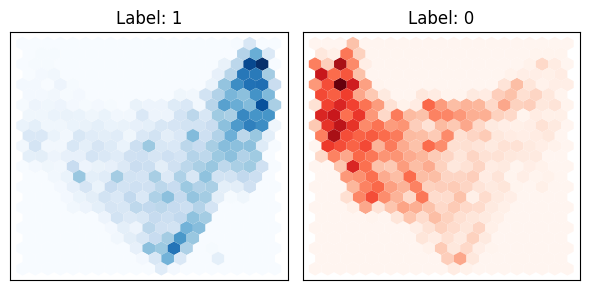

In [41]:
import matplotlib.pyplot as plt

# Ajustar o número de subplots de acordo com o número de classes
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes = axes.flatten()

cmaps = ["Blues", "Reds"]

# Obter os rótulos únicos diretamente do DataFrame
labels = train_df['labels'].unique()

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    # Filtrar o DataFrame com base no rótulo
    df_emb_sub = df_emb.query(f"label == {label}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(f"Label: {label}")
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()


Ao analisar o gráfico acima, foi possíve observar uma diferença bem representativa entre as duas classes (positiva e negativa). Porém, em alguns casos é possível observar que existem sobreposições entre os dois.

Treinando os dados com um classificador simples de regressão logística

In [42]:
#hide_output
# We increase `max_iter` to guarantee convergence
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [43]:
lr_clf.score(X_valid, y_valid)

0.8327114427860697

Comparando como o DummyClassifier

In [44]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.5

Apresentando a matriz de confusão do uso da regressão logística

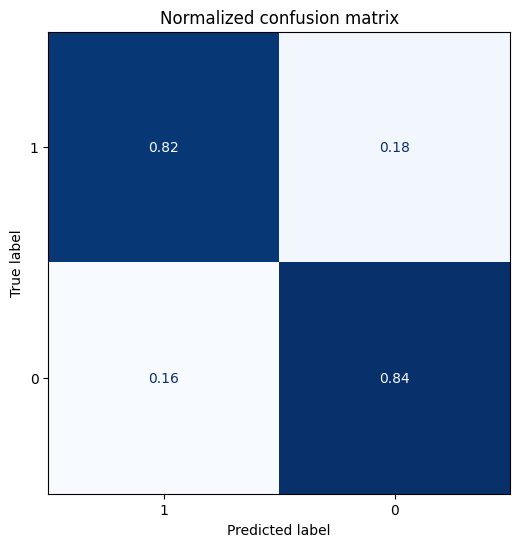

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

Aqui já é possível ver como os embeddings estão bem separados nesse dataser. Peloq que vimos anteriormente, as duas labels estão bem heterogêneas, o que traz um resultado bem surpreendente apenas com regressão logística.

In [46]:
from huggingface_hub import notebook_login

notebook_login()

Iniciando o modelo de classificação e transformando ele em binário, pois o original contém 3 saídas.

In [47]:
# hide_output
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)
         .to(device))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpo

In [48]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [50]:
from transformers import Trainer, TrainingArguments

batch_size = 32
logging_steps = len(dataset_encoded["train"]) // batch_size
name = f"{model_name}-finetuned"
training_args = TrainingArguments(output_dir=os.path.join(output_dir, name),
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [51]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=dataset_encoded["train"],
                  eval_dataset=dataset_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.375000,0.303067,0.868781,0.868773
2,0.246000,0.336617,0.871269,0.871232


In [52]:
# hide_output
preds_output = trainer.predict(dataset_encoded["validation"])

In [53]:
preds_output.metrics

{'test_loss': 0.33661702275276184,
 'test_accuracy': 0.871268656716418,
 'test_f1': 0.8712323520707483,
 'test_runtime': 33.5178,
 'test_samples_per_second': 95.949,
 'test_steps_per_second': 3.013}

In [54]:
y_preds = np.argmax(preds_output.predictions, axis=1)

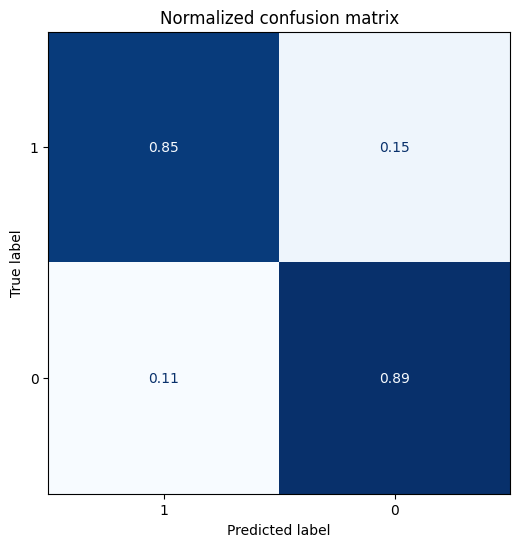

In [55]:
plot_confusion_matrix(y_preds, y_valid, labels)

As melhorias feitas pelo treinamento foram poucas. Um dos motivos é porque o modelo original tinha apenas 3 labels e já era treinado com dados bons, o que trouxe uma boa acurácia para o meu conjunto de dados. Outro fator é por conta da quantidade de épocas no treinamente, que foi muito baixa. A loss na segunda época subiu um pouco, o que pode dizer que o learning rate precisa ser ajustado, porém foi uma subida meio insignificante. Se fossem feitas novas epocas de treinamente é bem provável que a acurácia aumentaria.